<a href="https://colab.research.google.com/github/visiont3lab/tecnologie_data_science/blob/master/book/docs/classification/binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classifier 5 or not 5 ?

Obbiettivo: Implementare un algoritmo capace di classificare il numero 5 da un immagine. Se il numero 5 appare nell'immagine il rusultato sará vero altrimenti falso.

Tematiche:
  * Accuracy, Precision, Recall, F1 Score
  * Roc curve
  * Comparison binary vs random forest classifier

## Teoria
Quando parliamo di classificazione binaria possiamo avere quattro possibili risultati.
  * TN True Negative
  * TP True Positive
  * FN False Negative
  * FP False Positive

| Risultato Esatto   | Risulato Predetto |  |
|------------|---------------------------|--|
|            |   Negativo | Positivo |
|Negativo    |    TN      |    FP    |
|Positivo    |    FN      |    TP    |

### Metriche

* Accuracy: $\frac{TP+TN}{TP+TN+FP+FN}$

Proportion of correct classifications (true positves and negatives) from overall number of cases.

  Quante volte il nostro algoritmo ha predettto il risultato giusto? Sarebbe quante volte il classifcatore ha predetto vero ed era vero o a predetto falso ed era falso.

* Recall or Sensitivity: $\frac{TP}{TP+FN}$

Proportion of correct positive classifications (true positives) from cases that are actually positive.

  Quante volte il classificatore ha predetto vero ed era vero diviso lo stesso più quante volte il classificatore ha predetto falso ma in realtà era vero. La recall mi da la percentuale di quanto il mio algorimo ha risposto vero. Quante volte l'algorimo ha predetto che non era 5 ma in realtà lo era (in percentuale)? Percentuale di  volte che ho riconosciuto che era 5 rispetto a quante volte ho detto che non era 5 ma lo era.

* Precision: $\frac{TP}{TP+FP}$ 

Proportion of correct positive classifications (true positives) from cases that are predicted as  positive.

  Percentuale che rappressenta la frazione tra quante valte l'algoritmo ha predetto vero ed era vero diviso lo stesso più quante volte l'algoritmo ha preddeto vero ma in realtà era falso. Nel nostro esempio quante volte l'algoritmo ha predetto 5 ma in realtà non lo era (in percentale)? Percentuale di  volte che ho riconosciuto che era 5 rispetto a quante volte ho detto che era 5 ma non lo era.


Esempio:

| Risultato Esatto   | Risulato Predetto |  |
|------------|---------------------------|--|
|            |   Negativo | Positivo |
|Negativo    |    TN=97750     |    FP=150    |
|Positivo    |    FN=330      |    TP=1770    |



* Accuracy = $\frac{TP+TN}{TP+TN+FP+FN} = \frac{1770+97750}{100000}=0.9952$

* Recall = $\frac{TP}{TP+FN} = \frac{1770}{1770+330}=0.8428$

* Precision = $\frac{TP}{TP+FP} = \frac{1770}{1770+150}=0.9219$

È un modello buono?

Recall: percetuale di sbaglio dell'algoritmo nel predirre 5. 1 - 0.84 = 0.26%
Quanto l'algoritmo sbaglia nel dare come risulta che il numero è 5. 
Voglio essere sicuro che tutte le volte che un numero è 5 io (classifier) lo riconosca come 5.

Precision:Quanto l'algoritmo sbaglia nel dare come risulta che il numero non è 5
Voglio essere sicuro che tutte le volte che un numero no è 5 (classifier) io lo riconosca come NON 5.

Quindi possiamo concludere che il modello che abbiamo sarà ottimo nel riconoscere che in numero non è 5 (Precision=92%) mentre invece non sarà granche nel dire che il numero è 5 (Recall=84%)

Tumori:
Recall 95%: se vedo il tumore X lo riconosco al 95%. Quindi ho una bassa probabilità di di dire che "X" non è un tumore quando il realtà lo è.
Prcecision 60%: se vedo X ed non è un tumore ho una percentuale alta 40% di dire chè lo è. Cioè ho una probabilità alta di sbagliarmi sul fatto che un un X non è un tumore e per me lo è. (Diciamo che tendo un po a dire che tutto è tumore per non sbagliare) 


## Import Libraries

In [0]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

## Load the Dataset (MNIST)

In [0]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
Y = mnist["target"]
print(mnist.keys())
Y = Y.astype(np.uint8) # convert string target to int
X_train, X_test, Y_train, Y_test = X[:60000],X[60000:], Y[:60000], Y[60000:]
# override
Y_train = (Y_train == 5) # True for all 5s, False for all other digits.
Y_test = (Y_test == 5)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
X_train shape:  (60000, 784)
Y_train shape:  (60000,)
X_test shape:  (10000, 784)
Y_test shape:  (10000,)


## Classifier choice (Random Forest Classifier) and Training

Come funziona la cross validation?
https://911-code.com/come-e-scikit-imparare-cross_val_predict-precisione-punteggio-calcolato.html

In [0]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)
accuracy_train = cross_val_score(clf, X_train, Y_train, cv=3, scoring="accuracy")
print("accuracy train set split in 3 set: ", accuracy_train)

accuracy train set split in 3 set:  [0.98885 0.9863  0.98635]


### Perfomance Metrics Analysis on Train Set

In [0]:
Y_train_pred = cross_val_predict(clf, X_train,Y_train, cv=3)
conf_matrix = confusion_matrix(Y_train, Y_train_pred)

In [0]:
print("Confusion matrix Train Set: ")
print(conf_matrix)
res_precision_train_score = precision_score(Y_train, Y_train_pred) 
res_recall_train_score = recall_score(Y_train, Y_train_pred) 
res_f1_train_score = f1_score(Y_train, Y_train_pred)
print("Accuracy ", np.round(np.mean(accuracy_train),2) )
print("Precision ", np.round(res_precision_train_score,2) )
print("Recall ", np.round(res_recall_train_score,2) )
print("F1 Score ", np.round(res_f1_train_score,2) )

Confusion matrix Train Set: 
[[54362   217]
 [  309  5112]]
Accuracy  0.99
Precision  0.99
Recall  0.87
F1 Score  0.92
Default  Threshold chosen:  0.51


* Recall: Quanto l'algoritmo sbaglia nel dare come risultato che il numero è 5.
* Precision:  Quanto l'algoritmo sbaglia nel dare come risultato che il numero non è 5.

Esiste un modo di allenare il classificatore in modo da avere una recall più alta del 93%? Cioè voglio essere sicuro che l'algoritmo quando veda 5 lo riconsca sempre piuttosto che quando veda NON 5 dica è non 5.

## Test Classifier

Prediction (Not-5, Yes-5):  [[0.98 0.02]]


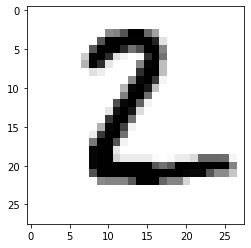

In [0]:
test_img = X_test[766]  # 5
test_img = X_test[1]  # 2
Y_pred = clf.predict_proba([test_img])
test_img = test_img.reshape(28, 28)
plt.imshow(test_img, cmap = mpl.cm.binary,interpolation="nearest")
print("Prediction (Not-5, Yes-5): ", Y_pred)

In [0]:
# Calculation default threshold
Y_proba = cross_val_predict(clf, X_train,Y_train, cv=3, method="predict_proba")
Y_scores = Y_proba[:, 1]
precisions, recalls, thresholds_pr = precision_recall_curve(Y_train, Y_scores)
threshold_chosen =thresholds_pr[np.argmax(precisions >= res_precision_train_score)]
print("Default  Threshold chosen: ", threshold_chosen )


Default  Threshold chosen:  0.51


## Come definiamo la a threshold sulla probabilità per dire che un numero è o non è 5?

### Recall - Precision threshold analysis

In [0]:
Y_proba = cross_val_predict(clf, X_train,Y_train, cv=3, method="predict_proba")
print("Y_proba shape ",Y_proba.shape)
print("Example Probabilities [Not-5, 5]: ",Y_proba[0])

Y_proba shape  (60000, 2)
Example Probabilities [Not-5, 5]:  [0.11 0.89]


Consideriamo solo la senconda colonna perchè ci interessa analizzare quando l'lagoritmo predice 5 se l'ha predetto correttamente oppure no.

In [0]:
# Prendiamo solo la seconda colonna 
Y_scores = Y_proba[:, 1]
print("Y_scores shape: ",Y_scores.shape)
print("Example Score [5]: ",Y_scores[0])

Y_scores shape:  (60000,)
Example Score [5]:  0.89


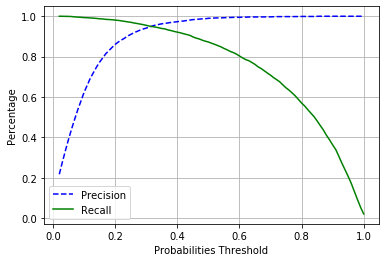

In [0]:
precisions, recalls, thresholds_pr = precision_recall_curve(Y_train, Y_scores)
def plot_precision_recall_vs_threshold(precisions,recalls, thresholds):
  plt.plot(thresholds_pr, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds_pr, recalls[:-1], "g-", label="Recall")
  plt.legend()
  plt.grid()

plot_precision_recall_vs_threshold(precisions,recalls, thresholds_pr)
plt.xlabel("Probabilities Threshold")
plt.ylabel("Percentage")
plt.show()

Ora se scelgo di avere una precision di 0.96 quale sarà la mia recall e viceversa?

In [0]:
print(Y_train[0])

True


In [0]:
# Set Precision
chosen_precision = 0.96
threshold_chosen =thresholds_pr[np.argmax(precisions >= chosen_precision)]
Y_train_pred_new = (Y_scores >= threshold_chosen) # Set True if Y_scores > threshold_precision
res_precision_train_score_new = precision_score(Y_train, Y_train_pred_new)
res_recall_train_score_new = recall_score(Y_train, Y_train_pred_new)
print("precision: ", np.round(res_precision_train_score_new,2), "recall: ", np.round(res_recall_train_score_new,2))
print("Threshold precision: ",threshold_chosen)

precision:  0.96 recall:  0.94
Threshold precision:  0.35


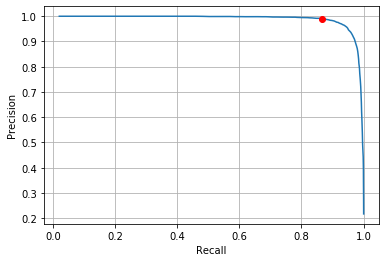

In [0]:
plt.plot(recalls[:-1],precisions[:-1])
plt.plot(res_recall_train_score,res_precision_train_score, 'ro')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [0]:
# Set Precision
chosen_recall = 0.87
threshold_chosen = thresholds_pr[np.argmax(recalls <= chosen_recall)]
Y_train_pred_new = (Y_scores >= threshold_chosen) # Set True if Y_scores > threshold_precision
res_precision_train_score_new = precision_score(Y_train, Y_train_pred_new)
res_recall_train_score_new = recall_score(Y_train, Y_train_pred_new)
print("precision: ", np.round(res_precision_train_score_new,2), "recall: ", np.round(res_recall_train_score_new,2))
print("Threshold recall: ",threshold_chosen)

precision:  0.99 recall:  0.87
Threshold recall:  0.51


### Roc Curve threshold analysis

| Risultato Esatto   | Risulato Predetto |  |
|------------|---------------------------|--|
|            |   Negativo | Positivo |
|Negativo    |    TN      |    FP    |
|Positivo    |    FN      |    TP    |


* False Positive Rate $FPR = \frac{FP}{FP+TN}$
* True Positive Rate (or recall) $TPR = \frac{TP}{TP+FN}$
* True Negative rate (or specificity):  $TNR = \frac{TN}{FP+TN}$


Binary classifier ROC AUC score:  0.9983436731328145
Threhsold chosen : 0.34
[[54362   217]
 [  309  5112]]


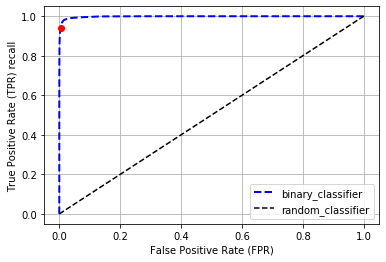

In [0]:
fpr, tpr, thresholds_roc = roc_curve(Y_train, Y_scores)
bin_roc_auc = roc_auc_score(Y_train, Y_scores)
print("Binary classifier ROC AUC score: ", bin_roc_auc)

chosen_tpr = 0.94 # same as recall
threshold_chosen =thresholds_roc[np.argmax(tpr >= chosen_tpr)]
print("Threhsold chosen :", threshold_chosen)
Y_train_pred_new = (Y_scores >= threshold_chosen)

conf_matrix = confusion_matrix(Y_train, Y_train_pred_new)
print(conf_matrix)
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]
chosen_fpr = FP/(FP+TN)
chosen_tpr_check = TP/(TP+FN)
#print(TN,FP,FN,TP)

plt.plot(fpr, tpr, "b--", linewidth=2, label="binary_classifier")
plt.plot([0, 1], [0, 1], 'k--', label="random_classifier") # random classifier
plt.plot(chosen_fpr, chosen_tpr,'ro')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR) recall")
plt.grid()
plt.legend()
plt.show()

## Test set analysis and Results

Prediction (Not-5, Yes-5):  [ True]


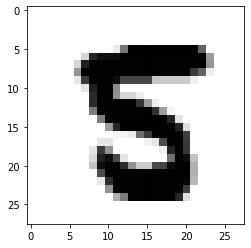

In [0]:
test_img = X_test[766]  # 5
#test_img = X_test[1]  # 2
Y_pred_proba = clf.predict_proba([test_img])
Y_score = Y_pred_proba[:, 1]
Y_pred = (Y_score >= threshold_chosen)
test_img = test_img.reshape(28, 28)
plt.imshow(test_img, cmap = mpl.cm.binary,interpolation="nearest")
print("Prediction (Not-5, Yes-5): ", Y_pred)

## Considerations

As a rule of thumb,you should prefer the PR curve whenever the positive class is rare orwhen you care more about the false positives than the false negatives,and the ROC curve otherwise. For example, looking at the previousROC curve (and the ROC AUC score), you may think that the classifieris really good. But this is mostly because there are few positives (5s)compared to the negatives (non-5s). In contrast, the PR curve makes itclear that the classifier has room for improvement (the curve could becloser to the top-right corner 

## Extra: Cross validation imaplementation

In [0]:
# Custom implementation of cross validation
# This code does the same of cross_val_score()
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, Y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  Y_train_folds = Y_train_5[train_index]
  X_test_fold = X_train[test_index]
  Y_test_fold = Y_train_5[test_index]
  clone_clf.fit(X_train_folds, Y_train_folds)
  Y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(Y_pred == Y_test_fold)
  print(n_correct / len(Y_pred)) # prints 0.9502, 0.96565 and 0.96495